# Übung II: Lineare Transformation

In dieser Übung werden wir Moleküle in 3D visualisieren und einige Funktionen schreiben, um die Winkel bzw. Diederwinkel in Molekülen zu messen. Dafür brauchen wir einige Vorbereitungen, sodass wir den Algorithmus der Messungen verstehen können. 

Wir kennen die Rechenregel für die Multiplikation einer Matrix mit einem Vektor: $\underline{\underline{M_1}} \cdot \vec{v} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \cdot \begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} ax + by \\ cx + dy \end{pmatrix} = \vec{v^{'}}$. Dies entspricht der Tranformation (z.B Rotation) des Vektors $\vec{v}$ durch die Matrix $\underline{\underline{M_1}}$. Nach der Transformation erhalten wir einen anderen Vektor $\vec{v^{'}}$. Wir können eine solche Transformation mit Python als Animation zeigen. Die Code dafür spielen aber gar keine Rolle in dieser Übung und Sie brauchen diese nicht zu lesen. Um die Animation zu sehen, müssen sie die Zellen dafür aber trotzdem ausführen. Gegegeben ist ein Beispiel für die Multiplikation $\begin{pmatrix} 2 & -1 \\ 1 & 0 \end{pmatrix} \cdot \begin{pmatrix} {\color{red}1} \\ {\color{red}2} \end{pmatrix} = \begin{pmatrix} {\color{blue}0} \\ {\color{blue}1} \end{pmatrix}$, wobei der Vektor $\begin{pmatrix} {\color{red}1} \\ {\color{red}2} \end{pmatrix}$ zu $\begin{pmatrix} {\color{blue}0} \\ {\color{blue}1} \end{pmatrix}$ transformiert wird. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML

f = plt.figure(figsize=([4,4]))

def animate(t):
    timescale_t = 1/47.8
    L = np.cos(np.pi/10 + t / 26.9 ) / np.cos(np.pi/10)
    x = L * np.cos( np.arctan(2) + t * timescale_t ) / np.cos( np.arctan(2) )
    y = L * np.sin( np.arctan(2) + t * timescale_t ) / np.sin( np.arctan(2) ) * 2
    #y = 1
    line.set_data([0,x], [0,y])
    point.set_data(x,y)
    text.set_text('v=['+"%.2f, %.2f"%(x, y)+']')
    text.set_position((x, y-0.5))

plt.xlim((-2.8,2.8))
plt.ylim((-2.8,2.8))

plt.plot([-10,10],[0,0],'r',alpha=0.2)
plt.plot([-10,10],[-1,-1],'r',alpha=0.2)
plt.plot([-10,10],[1,1],'r',alpha=0.2)
#plt.plot([-10,10],[-1,-1],'r',alpha=0.2)
#plt.plot([-10,10],[1,1],'r',alpha=0.2)
plt.plot([-10,10],[-2,-2],'r',alpha=0.2)
plt.plot([-10,10],[2,2],'r',alpha=0.2)

plt.plot([0,0],[-10,10],'b',alpha=0.2)
plt.plot([-1,-1],[-10,10],'b',alpha=0.2)
plt.plot([1,1],[-10,10],'b',alpha=0.2)
#plt.plot([-1,-1],[-10,10],'b',alpha=0.2)
#plt.plot([1,1],[-10,10],'b',alpha=0.2)
plt.plot([-2,-2],[-10,10],'b',alpha=0.2)
plt.plot([2,2],[-10,10],'b',alpha=0.2)

line, = plt.plot([],[], 'g', lw=2)
point, = plt.plot([1],[11],color='g',marker='o')
text = plt.text(1, 0.5, '', fontsize=10,horizontalalignment='center')
plt.arrow(0,0,1,0,head_width=0.05,color='r')
plt.arrow(0,0,0,1,head_width=0.05,color='b')
plt.text(1,0.1,'$e_x$',fontsize=12)
plt.text(0.1,1,'$e_y$',fontsize=12)
# plt.plot(1,2,color='g',marker='o',alpha=0.5)
plt.text(1.4,1.2,'$v$ = [2,1]')
# plt.plot(0,1,color='g',marker='o',alpha=0.5)
plt.text(-1.2,1.2,'$v^{\'}$ = [0,1]')
plt.title('Transformation des Vektors')

anim = ani.FuncAnimation(f, animate, frames=23, interval=100)
HTML(anim.to_jshtml())

Aber warum sieht die Rechenregel der Multiplikation so aus? 

In dem zwei-dimensionalen kartesischen Koordinatensystem $K_0$ sind die beiden Basisvektor $\vec{e_x} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ und $\vec{e_y} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$. Der Vektor $\vec{v} = \begin{pmatrix} {\color{red}1} \\ {\color{red}2} \end{pmatrix}$ in $K_0$ verbindet den Punkt $(1,2)$ mit dem Ursprung. Die Koordinaten des Punkts (Vektors) sind die Projektionen des Vektors auf die beiden Basisvektoren. Das heißt, $\vec{v} = {\color{red}1} \cdot \vec{e_x} + {\color{red}2} \cdot \vec{e_y} = 1 \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} + 2 \cdot \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} {\color{blue}1} \\ {\color{blue}2} \end{pmatrix}$. Die beiden Zahlen in Rot sind die Koordinaten des Vektors in einem beliebigen Koordinatensystem $\color{red}K_\color{red}i$. Die Zahlen in Blau sind die entsprechenden Koordinaten des Vektors im kartesischen Koordianten $\color{blue}K_\color{blue}0$. 

In [2]:
f = plt.figure(figsize=([4,4]))

plt.xlim((-2.8,2.8))
plt.ylim((-2.8,2.8))

plt.plot([-10,10],[0,0],'r',alpha=0.2)
plt.plot([-10,10],[-1,-1],'r',alpha=0.2)
plt.plot([-10,10],[1,1],'r',alpha=0.2)
plt.plot([-10,10],[-2,-2],'r',alpha=0.2)
plt.plot([-10,10],[2,2],'r',alpha=0.2)

plt.plot([0,0],[-10,10],'b',alpha=0.2)
plt.plot([-1,-1],[-10,10],'b',alpha=0.2)
plt.plot([1,1],[-10,10],'b',alpha=0.2)
plt.plot([-2,-2],[-10,10],'b',alpha=0.2)
plt.plot([2,2],[-10,10],'b',alpha=0.2)

plt.arrow(0,0,1,0,head_width=0.05,color='r')
plt.arrow(0,0,0,1,head_width=0.05,color='b')
plt.text(1,0.1,'$e_x$',fontsize=12)
plt.text(0.1,1,'$e_y$',fontsize=12)

plt.title('Koordinatensystem, wo die Basisvektoren $e_x$ = (1,0) und $e_y$ = (0,1) sind.');

Jetzt kommen wir zu einem anderen Koordinatensystem $\color{red}K_\color{red}1$ wo die beiden Basisvektoren $\vec{e_x^{'}} = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$ und $\vec{e_y^{'}} = \begin{pmatrix} -1 \\ 0 \end{pmatrix}$ sind. Der Vektor $\vec{v^{'}} = \begin{pmatrix} 1 \\ 2 \end{pmatrix} $ in $\color{red}K_\color{red}1$ verbindet auch den Punkt $(1,2)$ mit dem Ursprung. Dieser Vektor besitzt dann die Koordinaten von $\vec{v^{'}} = {\color{red}1} \cdot \vec{e_x^{'}} + {\color{red}2} \cdot \vec{e_y^{'}} = 1 \cdot \begin{pmatrix} 2 \\ 1 \end{pmatrix} + 2 \cdot \begin{pmatrix} -1 \\ 0 \end{pmatrix} = \begin{pmatrix} {\color{blue}0} \\ {\color{blue}1} \end{pmatrix}$ im kartesischen Koordinaten $\color{blue}K_\color{blue}0$. 

In [3]:
f = plt.figure(figsize=([4,4]))

plt.xlim((-2.8,2.8))
plt.ylim((-2.8,2.8))

plt.plot([-10,10],[-5,5],'r',alpha=0.2)
plt.plot([-10,10],[-5.5,4.5],'r',alpha=0.2)
plt.plot([-10,10],[-4.5,5.5],'r',alpha=0.2)
plt.plot([-10,10],[-6,4],'r',alpha=0.2)
plt.plot([-10,10],[-4,6],'r',alpha=0.2)
plt.plot([-10,10],[-6.5,3.5],'r',alpha=0.2)
plt.plot([-10,10],[-3.5,6.5],'r',alpha=0.2)
plt.plot([-10,10],[-3,7],'r',alpha=0.2)
plt.plot([-10,10],[-7,3],'r',alpha=0.2)
plt.plot([-10,10],[-7.5,2.5],'r',alpha=0.2)
plt.plot([-10,10],[-2.5,7.5],'r',alpha=0.2)
plt.plot([-10,10],[-2,8],'r',alpha=0.2)
plt.plot([-10,10],[-8,2],'r',alpha=0.2)
plt.plot([-10,10],[-8.5,1.5],'r',alpha=0.2)
plt.plot([-10,10],[-1.5,8.5],'r',alpha=0.2)
plt.plot([-10,10],[-1,9],'r',alpha=0.2)
plt.plot([-10,10],[-9,1],'r',alpha=0.2)

plt.plot([-10,10],[0,0],'b',alpha=0.1)
plt.plot([-10,10],[-1,-1],'b',alpha=0.1)
plt.plot([-10,10],[1,1],'b',alpha=0.1)
plt.plot([-10,10],[-2,-2],'b',alpha=0.1)
plt.plot([-10,10],[2,2],'b',alpha=0.1)

plt.arrow(0,0,2,1,head_width=0.05,color='r')
plt.arrow(0,0,-1,0,head_width=0.05,color='b')
plt.text(1.7,1.2,'$e_x$',fontsize=12)
plt.text(-1,0.2,'$e_y$',fontsize=12)

plt.xticks([])
plt.yticks([])
plt.title('Koordinatensystem, wo die Basisvektoren $e_x$ = (2,1) und $e_y$ = (-1,0) sind.');

Die Multiplikation $\begin{pmatrix} 2 & -1 \\ 1 & 0 \end{pmatrix} \cdot \begin{pmatrix} {\color{red}1} \\ {\color{red}2} \end{pmatrix} = \begin{pmatrix} {\color{blue}0} \\ {\color{blue}1} \end{pmatrix}$ hat "zufällig" das gleiche Ergebnis wie die Koordinaten von $\vec{v^{'}}$ in $\color{blue}K_\color{blue}0$. Das heißt: $\begin{pmatrix} 2 & -1 \\ 1 & 0 \end{pmatrix} \cdot \vec{v} = \vec{v^{'}}$. 

Wir haben aber nicht wie vorher den Vektor $\vec{v}$ durch eine Matrix $\underline{\underline{M_1}} = \begin{pmatrix} 2 & -1 \\ 1 & 0 \end{pmatrix}$ transformiert, um $\vec{v^{'}}$ zu erhalten. Stattdessen haben wir $\vec{v}$, der den Punkt $(1,2)$ mit dem Ursprung verbindet, in ein anderes Koordinatensystem $\color{red}K_\color{red}1$ gebracht. Der Vektor hat sich nicht geändert und verbindet immer noch den Punkt $(1,2)$ mit dem Ursprung in dem neuen Koordinatensystem. Die Koordinaten des Vektors nach der Umrechnung in das kartesische Koordiantensystem ergeben das gleiche Ergebnis wie die Transformation durch die Matrix $\underline{\underline{M_1}} = \begin{pmatrix} 2 & -1 \\ 1 & 0 \end{pmatrix}$. Der wichtige Aspekt ist hier, dass die beiden Basisvektoren von $\color{red}K_\color{red}1$ gleich der ersten und zweiten Spalte der Matrix von $\underline{\underline{M_1}}$ entsprechen. 

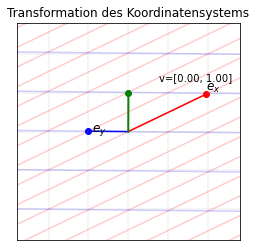

In [4]:
f = plt.figure(figsize=([4,4]))
def animate(t):
    timescale_a = 1/48
    La = np.sqrt(5) * np.sin(np.arcsin( 1/np.sqrt(5) ) + t / 25 )
    xa = La * np.cos( t * timescale_a )
    ya = La * np.sin( t * timescale_a )
    
    xh = 10 * xa
    yh = 10 * ya
    
    h0.set_data([-xh,xh], [-yh,yh])
    h1.set_data([-xh-1,xh-1], [-yh-1,yh-1])
    h2.set_data([-xh+1,xh+1], [-yh+1,yh+1])
    h3.set_data([-xh-2,xh-2], [-yh-2,yh-2])
    h4.set_data([-xh+2,xh+2], [-yh+2,yh+2])
    h5.set_data([-xh-3,xh-3],[-yh-3,yh-3])
    h6.set_data([-xh+3,xh+3],[-yh+3,yh+3])
    h7.set_data([-xh-4,xh-4],[-yh-4,yh-4])
    h8.set_data([-xh+4,xh+4],[-yh+4,yh+4])
    h9.set_data([-xh-5,xh-5],[-yh-5,yh-5])
    h10.set_data([-xh+5,xh+5],[-yh+5,yh+5])
    h11.set_data([-xh-6,xh-6],[-yh-6,yh-6])
    h12.set_data([-xh+6,xh+6],[-yh+6,yh+6])
    h13.set_data([-xh-7,xh-7],[-yh-7,yh-7])
    h14.set_data([-xh+7,xh+7],[-yh+7,yh+7])
    h15.set_data([-xh-8,xh-8],[-yh-8,yh-8])
    h16.set_data([-xh+8,xh+8],[-yh+8,yh+8])

    
    timescale_b = 1/14.1
    xb = np.cos( np.pi / 2 + t * timescale_b )
    yb = np.sin( np.pi / 2 + t * timescale_b )
        
    xv = 10 * xb
    yv = 10 * yb
    v0.set_data([-xv,xv],[-yv,yv])
    v1.set_data([-xv-1,xv-1],[-yv-1,yv-1])
    v2.set_data([-xv+1,xv+1],[-yv+1,yv+1])
    v3.set_data([-xv-2,xv-2],[-yv-2,yv-2])
    v4.set_data([-xv+2,xv+2],[-yv+2,yv+2])

    
    timescale_t = 1/47.8
    Lt = np.cos(np.pi/10 + t / 26.9 ) / np.cos(np.pi/10)
    xt = Lt * np.cos( np.arctan(2) + t * timescale_t ) / np.cos( np.arctan(2) )
    yt = Lt * np.sin( np.arctan(2) + t * timescale_t ) / np.sin( np.arctan(2) ) * 2
    
    line.set_data([0,xt], [0,yt])
    point.set_data([xt], [yt])
    text.set_text('v=['+"%.2f, %.2f"%(xt, yt)+']')
    ex.set_data([0,xa],[0,ya])
    point_ex.set_data([xa],[ya])
    ey.set_data([0,xb],[0,yb])
    point_ey.set_data([xb],[yb])
    text_ex.set_position((xa,ya+0.1))
    text_ey.set_position((xb+0.1,yb))
    
    return


plt.xlim((-2.8,2.8))
plt.ylim((-2.8,2.8))

h0, = plt.plot([-10,10],[0,0],'r',alpha=0.2)
h1, = plt.plot([-10,10],[-1,-1],'r',alpha=0.2)
h2, = plt.plot([-10,10],[1,1],'r',alpha=0.2)
h3, = plt.plot([-10,10],[-2,-2],'r',alpha=0.2)
h4, = plt.plot([-10,10],[2,2],'r',alpha=0.2)
h5, = plt.plot([-10,10],[-3,-3],'r',alpha=0.2)
h6, = plt.plot([-10,10],[3,3],'r',alpha=0.2)
h7, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h8, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h9, = plt.plot([-10,10],[-3,-3],'r',alpha=0.2)
h10, = plt.plot([-10,10],[3,3],'r',alpha=0.2)
h11, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h12, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h13, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h14, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h15, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h16, = plt.plot([-10,10],[4,4],'r',alpha=0.2)

v0, = plt.plot([0,0],[-10,10],'b',alpha=0.2)
v1, = plt.plot([-1,-1],[-10,10],'b',alpha=0.2)
v2, = plt.plot([1,1],[-10,10],'b',alpha=0.2)
v3, = plt.plot([-2,-2],[-10,10],'b',alpha=0.2)
v4, = plt.plot([2,2],[-10,10],'b',alpha=0.2)

ex, = plt.plot([],[],'r')
point_ex, = plt.plot([],[],'ro')
ey, = plt.plot([],[],'b')
point_ey, = plt.plot([],[],'bo')
line, = plt.plot([],[], 'g', lw=2)
point, = plt.plot([],[],'go')

text_ex = plt.text(1,0.1,'$e_x$',fontsize=12)
text_ey = plt.text(0.1,1,'$e_y$',fontsize=12)

plt.plot([-10,10],[0,0],'gray',alpha=0.1)
plt.plot([-10,10],[-1,-1],'gray',alpha=0.1)
plt.plot([-10,10],[1,1],'gray',alpha=0.1)
plt.plot([-10,10],[-2,-2],'gray',alpha=0.1)
plt.plot([-10,10],[2,2],'gray',alpha=0.1)
plt.plot([0,0],[-10,10],'gray',alpha=0.1)
plt.plot([-1,-1],[-10,10],'gray',alpha=0.1)
plt.plot([1,1],[-10,10],'gray',alpha=0.1)
plt.plot([-2,-2],[-10,10],'gray',alpha=0.1)
plt.plot([2,2],[-10,10],'gray',alpha=0.1)

text = plt.text(1.7, 1.3, '', fontsize=10,horizontalalignment='center')
plt.title('Transformation des Koordinatensystems')

plt.xticks([])
plt.yticks([])
anim = ani.FuncAnimation(f, animate,frames=23,interval=100)
HTML(anim.to_jshtml())

Diese zweite Animation zeigt den Prozess der Transformation der beiden Basisvektoren und des Koordinatensystems, während deren Änderungen die Koordinaten von $\vec{v}$ in dem kartesischen Koordinaten $\color{blue}K_\color{blue}0$ auch ständig ändert. In dem durch $\vec{e_x}$ und $\vec{e_y}$ gebildeten Koordinatensystem $\color{red}K_\color{red}i$ sind die Koordinaten von $\vec{v}$ immer noch $\begin{pmatrix} {\color{red}1} \\ {\color{red}2} \end{pmatrix}$ während der Transformation. 

Wir beweisen jetzt, dass mit der Vorstellung der Transformation des Koordinatensystems die Rechenregel abgeleitet werden kann:

$\vec{v^{'}} = \underline{\underline{M_1}} \cdot \vec{v} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \cdot \begin{pmatrix} {\color{red}x} \\ {\color{red}y} \end{pmatrix} = \vec{e_x^{'}} \cdot {\color{red}x} + \vec{e_y^{'}} \cdot {\color{red}y} = \begin{pmatrix} a \\ c \end{pmatrix} \cdot {\color{red}x} + \begin{pmatrix} b \\ d \end{pmatrix} \cdot {\color{red}y} = \begin{pmatrix} {\color{blue}a}{\color{blue}x} {\color{blue}+} {\color{blue}b}{\color{blue}y} \\ {\color{blue}c}{\color{blue}x} {\color{blue}+} {\color{blue}d}{\color{blue}y} \end{pmatrix}$. 

In [5]:
import sympy as sp
a, b, c, d, x, y = sp.symbols('a, b, c, d, x, y')

M1 = sp.Matrix([[a,b],
                [c,d]])

v = sp.Matrix([x,y])

e_x = sp.Matrix([a,c])

e_y = sp.Matrix([b,d])

print ("Ergebnis aus der Rechenregel:\n")
sp.pprint (M1*v)

print ("\nErgebnis aus der Ableitung:\n")
sp.pprint (e_x*x + e_y*y)

Ergebnis aus der Rechenregel:

⎡a⋅x + b⋅y⎤
⎢         ⎥
⎣c⋅x + d⋅y⎦

Ergebnis aus der Ableitung:

⎡a⋅x + b⋅y⎤
⎢         ⎥
⎣c⋅x + d⋅y⎦


Leiten Sie in ähnlicher Weise das Resultat der Multiplikation $\underline{\underline{M_2}} \cdot \underline{\underline{M_1}} = \begin{pmatrix} e & f \\ g & h \end{pmatrix} \cdot \begin{pmatrix} a & b \\ c & d \end{pmatrix}$ ab. Vergleichen Sie dann es mit dem aus der Rechenregel und denken Sie die Bedeutung der Multiplikation zwischen Matrizen nach. 

**Hinweise**

Wir können einfach die Matrix $\underline{\underline{M_1}}$ in zwei "pseudo-Vektoren" zerlegen: 

$\underline{\underline{M_1}} = \underline{\underline{M_{1x}}} + \underline{\underline{M_{1y}}} = \begin{pmatrix} a & 0 \\ c & 0 \end{pmatrix} + \begin{pmatrix} 0 & b \\ 0 & d \end{pmatrix}$. 

In [6]:
# Multiplikation zwischen Matrizen *
e, f, g, h = sp.symbols('e, f, g, h')
M2 = sp.Matrix([[e,f],
                [g,h]])

M1_x = sp.Matrix([[a,0],
                  [c,0]])

M1_y = sp.Matrix([[0,b],
                  [0,d]])

print ("Ergebnis aus der Rechenregel:\n")
sp.pprint (M2*M1)

print ("\nErgebnis aus der Ableitung:\n")
sp.pprint (M2*M1_x + M2*M1_y)

Ergebnis aus der Rechenregel:

⎡a⋅e + c⋅f  b⋅e + d⋅f⎤
⎢                    ⎥
⎣a⋅g + c⋅h  b⋅g + d⋅h⎦

Ergebnis aus der Ableitung:

⎡a⋅e + c⋅f  b⋅e + d⋅f⎤
⎢                    ⎥
⎣a⋅g + c⋅h  b⋅g + d⋅h⎦


Wir können jetzt auch der Determinante einer Matrix eine geometrische Bedeutung hinzufügen, wenn wir das durch die beiden Basisvektoren der Matrix bestimmte Parallelogramm auftragen (Die Auftragung ist jedoch nicht Gegenstand dieser Übung). 

Für die Auftragung nehmen wir die folgende Werte:  $\underline{\underline{M}} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} = \begin{pmatrix} 3 & 2 \\ 1 & 4 \end{pmatrix}$

In [7]:
# Initialisierung
import numpy as np
M = np.array([[3,2],
              [1,4]])
import matplotlib.pyplot as plt
f = plt.figure(figsize=([8,8]))

# Wir plot zu erst das gewöhnliche kartesische Koordinatensystem in Grau als Referenz. 
plt.plot([-2,7],[0,0],'gray',alpha=0.3) # Das ist die x-Achse, da alle die Werte für y null sind.
plt.plot([0,0],[-2,7],'gray',alpha=0.3) # Das ist die y-Achse und hier sind die x-Werte null. 

# Die erste Spalte von M1 und ihre Parallele wird als rot dargestellet. 
plt.plot( [  0 , M[0,0]  ], [  0, M[1,0]  ], 'r')
plt.plot( [  M[0,1] , M[0,1] + M[0,0]  ], [  M[1,1] , M[1,1] + M[1,0]  ], ':r')
# Die zweite Spalte von M1 und ihre Parallele wird als blau dargestellt. 
plt.plot( [  0 , M[0,1]  ], [  0, M[1,1]  ], 'b')

# Die anderen gestrichelten Linien sind Hilfsmittel zur bestimmung der Flöche.  
plt.plot( [  M[0,0] , M[0,0] + M[0,1]  ], [  M[1,0] , M[1,0] + M[1,1]  ], ':b')
plt.plot( [  M[0,1] , M[0,1] + M[0,0]  ], [  M[1,1] , M[1,1] + M[1,0]  ], ':r')

plt.plot( [  0 , M[0,0] + M[0,1]  ], [  M[0,0] + M[0,1] , M[0,0] + M[0,1]  ],  'black', linestyle=':' )
plt.plot( [  M[0,0] + M[0,1] , M[0,0] + M[0,1]  ], [  0 , M[0,0] + M[0,1]  ], 'black', linestyle=':' )

plt.plot( [  0 , M[0,1]  ], [  M[1,1] , M[1,1]  ],  'black', linestyle=':' )
plt.plot( [  M[0,1] , M[0,1]  ], [  M[1,1] , M[1,1] + M[1,0]  ],  'black', linestyle=':' )

plt.plot( [  M[0,0] , M[0,0] + M[0,1]  ], [  M[1,0] , M[1,0]  ],  'black', linestyle=':' )
plt.plot( [  M[0,0] , M[0,0]  ], [  0 , M[1,0]  ],  'black', linestyle=':' )

# Mit plt.text können wir text, z.B. Beschriftung der Länge, in die Graphik hinzufügen. 
plt.text( 1/2*M[0,0] , -0.5, 'a', color='r',size=30 )
plt.text( M[0,0] + 1/2*M[0,1], -0.5, 'b', color='b',size=30 )
plt.text( -0.5, 1/2*M[1,1], 'd', color='b',size=30)
plt.text( -0.5, M[1,1] + 1/2*M[1,0], 'c', color='r',size=30);


Aus der Grafik lässt sich die Fläche des Parallelogramms ableiten. Ergänzen Sie die folgenden Codes. 

In [8]:
# Fläche des Parallelogramms *
F = (a + b) * (c + d) - 2*b*c - b*d - a*c # Ersetzen Sie das Fragezeichen durch sinnvolle Formel. 

print ('Fläche des Parallelogramms:', sp.expand(F))

Fläche des Parallelogramms: a*d - b*c


Die Fläche ist gleich die Determinante der Matrix $\underline{\underline{M_1}} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$. Die Determinante kann jedoch einen negativen Wert annehmen. Aber was bedeutet eine negative Fläche? 

Für die Erklärung nehmen wir die beiden Matrizen $\underline{\underline{A_1}} = \begin{pmatrix} 1 & 1 \\ \frac{1}{2} & \frac{3}{2} \end{pmatrix}$ mit $det(\underline{\underline{A_1}}) = 1$ und $\underline{\underline{A_2}} = \begin{pmatrix} 1 & 1 \\ \frac{3}{2} & \frac{1}{2} \end{pmatrix}$ mit $det(\underline{\underline{A_2}}) = -1$. Die folgenden zwei Animationen zeigen die entsprechenden Transformationen hervorgerufen durch die zwei Matrizen. 

Die Antwort ist die Invertierung des von den beiden Basisvektoren aufgespannten Parallelogramms. Um

Bei einer positiven Determinante kommen die Vektoren in der ersten und zweiten Spalte in der Matrix gegen den Uhrzeigersinn vor, z.B die Matrizen $\underline{\underline{A_1}} = \begin{pmatrix} 1 & 1 \\ \frac{1}{2} & \frac{3}{2} \end{pmatrix}$ mit $det(\underline{\underline{A_1}}) = 1$. Für eine negative Determinante ist die Reihenfolge der beiden Spalten dann im Uhrzeigersinn, z.B. $\underline{\underline{A_2}} = \begin{pmatrix} 1 & 1 \\ \frac{3}{2} & \frac{1}{2} \end{pmatrix}$ mit $det(\underline{\underline{A_2}}) = -1$. 

In [9]:
f = plt.figure(figsize=([4,4]))
def animate(t):
    timescale_a = 1/48
    La = np.sqrt(5/4) * np.sin(np.arcsin( 1/np.sqrt(5/4) ) + t / 30 )
    xa = La * np.cos( t * timescale_a )
    ya = La * np.sin( t * timescale_a )
    
    xh = 20 * xa
    yh = 20 * ya
    
    h0.set_data([-xh,xh], [-yh,yh])
    h1.set_data([-xh-2,xh-2], [-yh-2,yh-2])
    h2.set_data([-xh+2,xh+2], [-yh+2,yh+2])
    h3.set_data([-xh-4,xh-4], [-yh-4,yh-4])
    h4.set_data([-xh+4,xh+4], [-yh+4,yh+4])
    h5.set_data([-xh-6,xh-6],[-yh-6,yh-6])
    h6.set_data([-xh+6,xh+6],[-yh+6,yh+6])
    h7.set_data([-xh-8,xh-8],[-yh-8,yh-8])
    h8.set_data([-xh+8,xh+8],[-yh+8,yh+8])
    h9.set_data([-xh-10,xh-10],[-yh-10,yh-10])
    h10.set_data([-xh+10,xh+10],[-yh+10,yh+10])
    h11.set_data([-xh-12,xh-12],[-yh-12,yh-12])
    h12.set_data([-xh+12,xh+12],[-yh+12,yh+12])
    h13.set_data([-xh-14,xh-14],[-yh-14,yh-14])
    h14.set_data([-xh+14,xh+14],[-yh+14,yh+14])
    h15.set_data([-xh-16,xh-16],[-yh-16,yh-16])
    h16.set_data([-xh+16,xh+16],[-yh+16,yh+16])
    h17.set_data([-xh-18,xh-18],[-yh-18,yh-18])
    h18.set_data([-xh+18,xh+18],[-yh+18,yh+18])
    h19.set_data([-xh-20,xh-20],[-yh-20,yh-20])
    h20.set_data([-xh+20,xh+20],[-yh+20,yh+20])
    h21.set_data([-xh-22,xh-22],[-yh-22,yh-22])
    h22.set_data([-xh+22,xh+22],[-yh+22,yh+22])

    
    timescale_b = 1/38
    Lb = np.sqrt(13/4) * np.sin( np.arcsin( 1/np.sqrt(13/4) ) + t / 19 )
    xb = Lb * np.cos( np.pi / 2 - t * timescale_b )
    yb = Lb * np.sin( np.pi / 2 - t * timescale_b )
        
    xv = 10 * xb
    yv = 10 * yb
    v0.set_data([-xv,xv],[-yv,yv])
    v1.set_data([-xv-2,xv-2],[-yv-2,yv-2])
    v2.set_data([-xv+2,xv+2],[-yv+2,yv+2])
    v3.set_data([-xv-4,xv-4],[-yv-4,yv-4])
    v4.set_data([-xv+4,xv+4],[-yv+4,yv+4])
    v5.set_data([-xv-6,xv-6],[-yv-6,yv-6])
    v6.set_data([-xv+6,xv+6],[-yv+6,yv+6])
    v7.set_data([-xv-8,xv-8],[-yv-8,yv-8])
    v8.set_data([-xv+8,xv+8],[-yv+8,yv+8])
    v9.set_data([-xv-10,xv-10],[-yv-10,yv-10])
    v10.set_data([-xv+10,xv+10],[-yv+10,yv+10])
    v11.set_data([-xv-12,xv-12],[-yv-12,yv-12])
    v12.set_data([-xv+12,xv+12],[-yv+12,yv+12])
    v13.set_data([-xv-14,xv-14],[-yv-14,yv-14])
    v14.set_data([-xv+14,xv+14],[-yv+14,yv+14])
    v15.set_data([-xv-16,xv-16],[-yv-16,yv-16])
    v16.set_data([-xv+16,xv+16],[-yv+16,yv+16])
    v17.set_data([-xv-18,xv-18],[-yv-18,yv-18])
    v18.set_data([-xv+18,xv+18],[-yv+18,yv+18])
    v19.set_data([-xv-20,xv-20],[-yv-20,yv-20])
    v20.set_data([-xv+20,xv+20],[-yv+20,yv+20])
    v21.set_data([-xv-22,xv-22],[-yv-22,yv-22])
    v22.set_data([-xv+22,xv+22],[-yv+22,yv+22])

    ex.set_data([0,xa],[0,ya])
    point_ex.set_data([xa],[ya])
    ey.set_data([0,xb],[0,yb])
    point_ey.set_data([xb],[yb])
    text_ex.set_position((xa,ya+0.1))
    text_ey.set_position((xb+0.1,yb))
    
    return


plt.xlim((-1.8,1.8))
plt.ylim((-1.8,1.8))

h0, = plt.plot([-10,10],[0,0],'r',alpha=0.2)
h1, = plt.plot([-10,10],[-1,-1],'r',alpha=0.2)
h2, = plt.plot([-10,10],[1,1],'r',alpha=0.2)
h3, = plt.plot([-10,10],[-2,-2],'r',alpha=0.2)
h4, = plt.plot([-10,10],[2,2],'r',alpha=0.2)
h5, = plt.plot([-10,10],[-3,-3],'r',alpha=0.2)
h6, = plt.plot([-10,10],[3,3],'r',alpha=0.2)
h7, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h8, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h9, = plt.plot([-10,10],[-3,-3],'r',alpha=0.2)
h10, = plt.plot([-10,10],[3,3],'r',alpha=0.2)
h11, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h12, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h13, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h14, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h15, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h16, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h17, = plt.plot([-10,10],[-5,-5],'r',alpha=0.2)
h18, = plt.plot([-10,10],[5,5],'r',alpha=0.2)
h19, = plt.plot([-10,10],[-6,-6],'r',alpha=0.2)
h20, = plt.plot([-10,10],[6,6],'r',alpha=0.2)
h21, = plt.plot([-10,10],[-7,-7],'r',alpha=0.2)
h22, = plt.plot([-10,10],[8,8],'r',alpha=0.2)

v0, = plt.plot([0,0],[-10,10],'b',alpha=0.2)
v1, = plt.plot([-1,-1],[-10,10],'b',alpha=0.2)
v2, = plt.plot([1,1],[-10,10],'b',alpha=0.2)
v3, = plt.plot([-2,-2],[-10,10],'b',alpha=0.2)
v4, = plt.plot([2,2],[-10,10],'b',alpha=0.2)
v5, = plt.plot([-3,-3],[-10,10],'b',alpha=0.2)
v6, = plt.plot([3,3],[-10,10],'b',alpha=0.2)
v7, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v8, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v9, = plt.plot([-3,-3],[-10,10],'b',alpha=0.2)
v10, = plt.plot([3,3],[-10,10],'b',alpha=0.2)
v11, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v12, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v13, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v14, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v15, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v16, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v17, = plt.plot([-5,-5],[-10,10],'b',alpha=0.2)
v18, = plt.plot([5,5],[-10,10],'b',alpha=0.2)
v19, = plt.plot([-6,-6],[-10,10],'b',alpha=0.2)
v20, = plt.plot([6,6],[-10,10],'b',alpha=0.2)
v21, = plt.plot([-7,-7],[-10,10],'b',alpha=0.2)
v22, = plt.plot([8,8],[-10,10],'b',alpha=0.2)

ex, = plt.plot([],[],'r')
point_ex, = plt.plot([],[],'ro')
ey, = plt.plot([],[],'b')
point_ey, = plt.plot([],[],'bo')
line, = plt.plot([],[], 'g', lw=2)
point, = plt.plot([],[],'go')

text_ex = plt.text(1,0.1,'$e_x$',fontsize=12)
text_ey = plt.text(0.1,1,'$e_y$',fontsize=12)

plt.plot([-10,10],[0,0],'gray',alpha=0.1)
plt.plot([-10,10],[-1,-1],'gray',alpha=0.1)
plt.plot([-10,10],[1,1],'gray',alpha=0.1)
plt.plot([-10,10],[-2,-2],'gray',alpha=0.1)
plt.plot([-10,10],[2,2],'gray',alpha=0.1)
plt.plot([-10,10],[-3,-3],'gray',alpha=0.1)
plt.plot([-10,10],[3,3],'gray',alpha=0.1)
plt.plot([-10,10],[-4,-4],'gray',alpha=0.1)
plt.plot([-10,10],[4,4],'gray',alpha=0.1)

plt.plot([0,0],[-10,10],'gray',alpha=0.1)
plt.plot([-1,-1],[-10,10],'gray',alpha=0.1)
plt.plot([1,1],[-10,10],'gray',alpha=0.1)
plt.plot([-2,-2],[-10,10],'gray',alpha=0.1)
plt.plot([2,2],[-10,10],'gray',alpha=0.1)
plt.plot([-3,-3],[-10,10],'gray',alpha=0.1)
plt.plot([3,3],[-10,10],'gray',alpha=0.1)
plt.plot([-4,-4],[-10,10],'gray',alpha=0.1)
plt.plot([4,4],[-10,10],'gray',alpha=0.1)

#plt.plot(2,3,'bo')

text = plt.text(1.7, 1.3, '', fontsize=10,horizontalalignment='center')
plt.title('Transformation des Koordinatensystems durch $A_1$',size=11)

plt.xticks([])
plt.yticks([])
anim = ani.FuncAnimation(f, animate,frames=23,interval=100)
HTML(anim.to_jshtml())

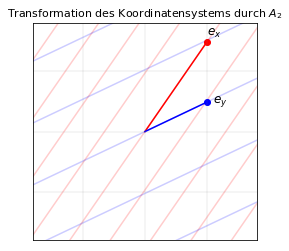

In [10]:
f = plt.figure(figsize=([4,4]))
def animate(t):
    timescale_a = 1/22.5
    La = np.sqrt(13/4) * np.sin(np.arcsin( 1/np.sqrt(13/4) ) + t / 25 )
    xa = La * np.cos( t * timescale_a )
    ya = La * np.sin( t * timescale_a )
    
    xh = 10 * xa
    yh = 10 * ya
    
    h0.set_data([-xh,xh], [-yh,yh])
    h1.set_data([-xh-2,xh-2], [-yh-2,yh-2])
    h2.set_data([-xh+2,xh+2], [-yh+2,yh+2])
    h3.set_data([-xh-4,xh-4], [-yh-4,yh-4])
    h4.set_data([-xh+4,xh+4], [-yh+4,yh+4])
    h5.set_data([-xh-6,xh-6],[-yh-6,yh-6])
    h6.set_data([-xh+6,xh+6],[-yh+6,yh+6])
    h7.set_data([-xh-8,xh-8],[-yh-8,yh-8])
    h8.set_data([-xh+8,xh+8],[-yh+8,yh+8])
    h9.set_data([-xh-10,xh-10],[-yh-10,yh-10])
    h10.set_data([-xh+10,xh+10],[-yh+10,yh+10])
    h11.set_data([-xh-12,xh-12],[-yh-12,yh-12])
    h12.set_data([-xh+12,xh+12],[-yh+12,yh+12])
    h13.set_data([-xh-14,xh-14],[-yh-14,yh-14])
    h14.set_data([-xh+14,xh+14],[-yh+14,yh+14])
    h15.set_data([-xh-16,xh-16],[-yh-16,yh-16])
    h16.set_data([-xh+16,xh+16],[-yh+16,yh+16])
    h17.set_data([-xh-18,xh-18],[-yh-18,yh-18])
    h18.set_data([-xh+18,xh+18],[-yh+18,yh+18])
    h19.set_data([-xh-20,xh-20],[-yh-20,yh-20])
    h20.set_data([-xh+20,xh+20],[-yh+20,yh+20])
    h21.set_data([-xh-22,xh-22],[-yh-22,yh-22])
    h22.set_data([-xh+22,xh+22],[-yh+22,yh+22])

    
    timescale_b = 1/19.7
    Lb = np.sqrt(5/4) * np.sin( np.arcsin( 1/np.sqrt(5/4) ) + t / 37 )
    xb = Lb * np.cos( np.pi / 2 - t * timescale_b )
    yb = Lb * np.sin( np.pi / 2 - t * timescale_b )
        
    xv = 10 * xb
    yv = 10 * yb
    v0.set_data([-xv,xv],[-yv,yv])
    v1.set_data([-xv-2,xv-2],[-yv-2,yv-2])
    v2.set_data([-xv+2,xv+2],[-yv+2,yv+2])
    v3.set_data([-xv-4,xv-4],[-yv-4,yv-4])
    v4.set_data([-xv+4,xv+4],[-yv+4,yv+4])
    v5.set_data([-xv-6,xv-6],[-yv-6,yv-6])
    v6.set_data([-xv+6,xv+6],[-yv+6,yv+6])
    v7.set_data([-xv-8,xv-8],[-yv-8,yv-8])
    v8.set_data([-xv+8,xv+8],[-yv+8,yv+8])
    v9.set_data([-xv-10,xv-10],[-yv-10,yv-10])
    v10.set_data([-xv+10,xv+10],[-yv+10,yv+10])
    v11.set_data([-xv-12,xv-12],[-yv-12,yv-12])
    v12.set_data([-xv+12,xv+12],[-yv+12,yv+12])
    v13.set_data([-xv-14,xv-14],[-yv-14,yv-14])
    v14.set_data([-xv+14,xv+14],[-yv+14,yv+14])
    v15.set_data([-xv-16,xv-16],[-yv-16,yv-16])
    v16.set_data([-xv+16,xv+16],[-yv+16,yv+16])
    v17.set_data([-xv-18,xv-18],[-yv-18,yv-18])
    v18.set_data([-xv+18,xv+18],[-yv+18,yv+18])
    v19.set_data([-xv-20,xv-20],[-yv-20,yv-20])
    v20.set_data([-xv+20,xv+20],[-yv+20,yv+20])
    v21.set_data([-xv-22,xv-22],[-yv-22,yv-22])
    v22.set_data([-xv+22,xv+22],[-yv+22,yv+22])

    ex.set_data([0,xa],[0,ya])
    point_ex.set_data([xa],[ya])
    ey.set_data([0,xb],[0,yb])
    point_ey.set_data([xb],[yb])
    text_ex.set_position((xa,ya+0.1))
    text_ey.set_position((xb+0.1,yb))
    
    return


plt.xlim((-1.8,1.8))
plt.ylim((-1.8,1.8))

h0, = plt.plot([-10,10],[0,0],'r',alpha=0.2)
h1, = plt.plot([-10,10],[-1,-1],'r',alpha=0.2)
h2, = plt.plot([-10,10],[1,1],'r',alpha=0.2)
h3, = plt.plot([-10,10],[-2,-2],'r',alpha=0.2)
h4, = plt.plot([-10,10],[2,2],'r',alpha=0.2)
h5, = plt.plot([-10,10],[-3,-3],'r',alpha=0.2)
h6, = plt.plot([-10,10],[3,3],'r',alpha=0.2)
h7, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h8, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h9, = plt.plot([-10,10],[-3,-3],'r',alpha=0.2)
h10, = plt.plot([-10,10],[3,3],'r',alpha=0.2)
h11, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h12, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h13, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h14, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h15, = plt.plot([-10,10],[-4,-4],'r',alpha=0.2)
h16, = plt.plot([-10,10],[4,4],'r',alpha=0.2)
h17, = plt.plot([-10,10],[-5,-5],'r',alpha=0.2)
h18, = plt.plot([-10,10],[5,5],'r',alpha=0.2)
h19, = plt.plot([-10,10],[-6,-6],'r',alpha=0.2)
h20, = plt.plot([-10,10],[6,6],'r',alpha=0.2)
h21, = plt.plot([-10,10],[-7,-7],'r',alpha=0.2)
h22, = plt.plot([-10,10],[8,8],'r',alpha=0.2)

v0, = plt.plot([0,0],[-10,10],'b',alpha=0.2)
v1, = plt.plot([-1,-1],[-10,10],'b',alpha=0.2)
v2, = plt.plot([1,1],[-10,10],'b',alpha=0.2)
v3, = plt.plot([-2,-2],[-10,10],'b',alpha=0.2)
v4, = plt.plot([2,2],[-10,10],'b',alpha=0.2)
v5, = plt.plot([-3,-3],[-10,10],'b',alpha=0.2)
v6, = plt.plot([3,3],[-10,10],'b',alpha=0.2)
v7, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v8, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v9, = plt.plot([-3,-3],[-10,10],'b',alpha=0.2)
v10, = plt.plot([3,3],[-10,10],'b',alpha=0.2)
v11, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v12, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v13, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v14, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v15, = plt.plot([-4,-4],[-10,10],'b',alpha=0.2)
v16, = plt.plot([4,4],[-10,10],'b',alpha=0.2)
v17, = plt.plot([-5,-5],[-10,10],'b',alpha=0.2)
v18, = plt.plot([5,5],[-10,10],'b',alpha=0.2)
v19, = plt.plot([-6,-6],[-10,10],'b',alpha=0.2)
v20, = plt.plot([6,6],[-10,10],'b',alpha=0.2)
v21, = plt.plot([-7,-7],[-10,10],'b',alpha=0.2)
v22, = plt.plot([8,8],[-10,10],'b',alpha=0.2)

ex, = plt.plot([],[],'r')
point_ex, = plt.plot([],[],'ro')
ey, = plt.plot([],[],'b')
point_ey, = plt.plot([],[],'bo')
line, = plt.plot([],[], 'g', lw=2)
point, = plt.plot([],[],'go')

text_ex = plt.text(1,0.1,'$e_x$',fontsize=12)
text_ey = plt.text(0.1,1,'$e_y$',fontsize=12)

plt.plot([-10,10],[0,0],'gray',alpha=0.1)
plt.plot([-10,10],[-1,-1],'gray',alpha=0.1)
plt.plot([-10,10],[1,1],'gray',alpha=0.1)
plt.plot([-10,10],[-2,-2],'gray',alpha=0.1)
plt.plot([-10,10],[2,2],'gray',alpha=0.1)
plt.plot([-10,10],[-3,-3],'gray',alpha=0.1)
plt.plot([-10,10],[3,3],'gray',alpha=0.1)
plt.plot([-10,10],[-4,-4],'gray',alpha=0.1)
plt.plot([-10,10],[4,4],'gray',alpha=0.1)

plt.plot([0,0],[-10,10],'gray',alpha=0.1)
plt.plot([-1,-1],[-10,10],'gray',alpha=0.1)
plt.plot([1,1],[-10,10],'gray',alpha=0.1)
plt.plot([-2,-2],[-10,10],'gray',alpha=0.1)
plt.plot([2,2],[-10,10],'gray',alpha=0.1)
plt.plot([-3,-3],[-10,10],'gray',alpha=0.1)
plt.plot([3,3],[-10,10],'gray',alpha=0.1)
plt.plot([-4,-4],[-10,10],'gray',alpha=0.1)
plt.plot([4,4],[-10,10],'gray',alpha=0.1)

# plt.plot(1,3/2,'ro')
# plt.plot(1,1/2,'bo')

text = plt.text(1.7, 1.3, '', fontsize=10,horizontalalignment='center')
plt.title('Transformation des Koordinatensystems durch $A_2$',size=11)

plt.xticks([])
plt.yticks([])
anim = ani.FuncAnimation(f, animate,frames=23,interval=100)
HTML(anim.to_jshtml())

Bei der Transformation durch $A_2$ mit $det(A_2) = -1$ wechselt die Reihenfolge der beiden Basisvektoren von gegen den Uhrzeigersinn zu im Uhrzeigersinn. Eine negative Fläche entspricht deshalb der Invertierung des von den beiden Basisvektoren aufgespannten Parallelogramms. 

#### Einschub I. 
****
Beweisen Sie die Beziehung $det(\underline{\underline{M_1}}) \cdot det(\underline{\underline{M_2}}) = det(\underline{\underline{M_1}} \cdot \underline{\underline{M_2}})$, wobei $\underline{\underline{M_1}} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$ und $\underline{\underline{M_2}} = \begin{pmatrix} e & f \\ g & h \end{pmatrix}$ gilt. 

In [11]:
# Diese Beziehung lässt sich auch ohne Code nachweisen, wenn man aus der geometrischen Bedeutung der Determinante ausgehen. *
left = M1.det()*M2.det()
print ('links: ', sp.expand(left))
print ('rechts:', (M1@M2).det())

links:  a*d*e*h - a*d*f*g - b*c*e*h + b*c*f*g
rechts: a*d*e*h - a*d*f*g - b*c*e*h + b*c*f*g


****
Für eine $3 \times 3 $ Matrix wird die Determinante dementsprechend das Volumen. (Positive und negative Determinante entsprechen jeweils das rechts- und linkshändige Koordinatensystem)

Damit ist es auch offensichtlich, warum muss die Determinante gleich null sein, wenn die Spaltenvektoren in der Matrix $\underline{\underline{M_3}} = \begin{pmatrix} a & b & c \\ d & e & f \\ g & h & i \end{pmatrix}$ linearabhängig sind: Für drei linearabhängige Vektoren liegt ein Vektor auf der durch die anderen zwei Vektoren eingespannten Ebene und das Volumen bzw. die Determinante ist dann null. 

Aus der geometrischen Bedeutung lassen sich auch die Formulierung des Kreuzprodukts und die Cramersche Regel intuitiv ableiten. Wir sind jedoch in einer Python-Übung und wird nicht weiter in diese Richtung fortfahren. Für Interessierte empfehle ich die Videos von [3Blue1Brown](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=1). 

Wir schreiben jetzt eine einfache Funktion, womit wir die Norm eines Vektors nach der Gleichung $ |\vec{v}| = \sqrt{\vec{v} \cdot \vec{v}}$ berechnen können. 

In [12]:
def norm(vec):
    norm = np.sqrt(vec@vec)
    return norm

Die Variable **vec** in den Klammern ist die Eingabe für die Funktion **norm**. Eine Funktion kann auch mehrere Eingaben besitzen. 

**return** definiert, was die Funktion ausgibt, wenn aufgerufen wird. Die Anzahl der Ausgabe(n) ist auch nicht begrenzt. 

*Test der Funktion*

Berechnen Sie die Norm des Vektors $\begin{pmatrix} 3 \\ 4 \end{pmatrix}$

In [13]:
# Berechnung der Norm *
a = np.array([3,4])
print(norm(a))

5.0


Mit der Funktion **norm** wird es einfacher den Winkels zwischen zwei Vektoren $\vec{v_1}$ und $\vec{v_2}$ nach der Gleichung $\alpha_{v_1,v_2} = \arccos(\ \frac{ \vec{v_1} \cdot \vec{v_2} }{ |\vec{v_1}| \cdot |\vec{v_2}| }\ )$ zu berechnen. 

Schreiben Sie jetzt selbst diese Funktion für die Bestimmung des Winkels. 

**Hinweise**:

Das Ergebnis der Funktion **np.arccos()** ist in der Einheit von Radiant gegeben. Wir brauchen deshalb den Faktor $\frac{180^{\ \circ}}{\pi}$  um es in Grad umzuwandeln. 

In [14]:
# Funktion zur Berechnung des Winkels zwischen zwei Vektoren *
def angle_vec(vec1,vec2):
    cos = (vec1@vec2) / ( norm(vec1) * norm(vec2)  )
    angle = np.arccos(cos) * 180 / np.pi
    return angle

*Test der Funktion*

Berechnen Sie den Winkel zwischen den beiden Vektoren $\begin{pmatrix} 3 \\ 4 \end{pmatrix}$ und $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$. 

In [15]:
# Berechnung des Winkels
b = np.array([1,0])
print (angle_vec(a,b))

53.13010235415598


Diese Funktion kann nur einen Winkel zwischen $0^\circ$ und $180^\circ$ zurückgeben. In manchen Fällen ist es jedoch notwendig, einen Winkel im Umfang von $-180^\circ$ bis zu $180^\circ$ zu bestimmen, wenn die Reihenfolge beider Vektoren unterschieden werden muss. 

Für zwei-dimensionale Vektoren ist es einfach realisierbar, durch die vorher erwähnte Determinante der Matrix, deren Spalte die beiden Vektoren sind, das Vorzeichen zu bestimmen. 

Für drei-dimensionale Vektoren, können wir auch das Vorzeichen der Determinante ausnutzen. Die Berechnung der Determinante erfordert jedoch quadratische Matrizen und ein beliebige externer Vektor muss als Referenz eingebracht werden, um die Händigkeit zu bestimmen. Wir nehmen für die Einfachheit $\vec{v_{ref}} = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$ und bilden zusammen mit den Vektoren $\vec{v_1} = \begin{pmatrix} x_1 \\ y_1 \\ z_1 \end{pmatrix}$ und $\vec{v_2} = \begin{pmatrix} x_2 \\ y_2 \\ z_2 \end{pmatrix}$ die Matrix $\underline{\underline{M}} = \begin{pmatrix} 1 & x_1 & x_2 \\ 0 & y_1 & y_2 \\ 0 & z_1 & z_2 \end{pmatrix}$. 

Der Nachteil ist jedoch, dass wenn $\vec{v_{ref}}$ in der Ebene von $\vec{v_1}$ und $\vec{v_2}$ liegt, die Determinante $det(\underline{\underline{M}})$ gleich null ist. Die Bestimmung des Vorzeichens der Determinante wird damit unmöglich. 

Eine solche Situation ist zu vermeiden, wenn wir drei Referenzvektoren $\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$, $\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}$ und $\begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$ vorbereiten, die nicht auf einer Ebene liegen. Im Fall einer Null-Determinante ändern wir dann den Referenzvektor. 

Die Dimension der Vektoren ist mit dem Befehl **len()** zu bestimmen und die obengenannten Situationen sind dann mit dem Stichwort **if** unterschiedlich zu behandeln. 

Ein einfaches Beispiel: 

In [16]:
a = np.array([3,4])
b = np.array([1,0])
if len(a) == 2:
    M = np.array([a,b])
    det = np.linalg.det(M)
    if det < 0:
        print ('Die Dimension des Vektors ist 2 und die Determinante ist kleiner as null')

Die Dimension des Vektors ist 2 und die Determinante ist kleiner as null


Schreiben Sie jetzt aus dem obigen Algorithmus eine Funktion, womit wir den Winkel zwischen zwei Vektoren im Umfang von $-180^\circ$ bis zu $180^\circ$ bestimmen können. 

In [17]:
# Winkelberechnung von −180 bis zu 180 grad. *
def angle_vec(vec1, vec2):
    cos = (vec1 @ vec2) / ( norm(vec1) * norm(vec2)  )
    angle = np.arccos(cos) * 180 / np.pi
    
    if len(vec1) == 2:
        det = vec1[0] * vec2[1] - vec1[1] * vec2[0]
        if det < 0:
            angle = - angle
            
    if len(vec1) == 3:
        ref = np.array([1,0,0])
        M = np.array([ref,vec1,vec2])
        det = np.linalg.det(M)
        
        if det == 0:
            ref = np.array([0,1,0])
            M = np.array([ref,vec1,vec2])
            det = np.linalg.det(M)
            if det == 0:
                ref = np.array([0,0,1])
                M = np.array([ref,vec1,vec2])
                det = np.linalg.det(M)
        
        if det < 0: 
            angle = - angle    
    
    return angle


*Test der Funktion*

Berechnen Sie den Winkel zwischen den Vektoren $\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$ und $\begin{pmatrix} -1 \\ -1 \\ 0 \end{pmatrix}$. Tauschen Sie die Reihenfolge der beiden Vektor für die Eingabe der Funktion aus und berechnen Sie dann noch mal den Winkel. 

In [18]:
# Bestimmung des Winkels *
c1 = np.array([1,0,0])
c2 = np.array([-1,-1,0])
print (angle_vec(c1,c2))
print (angle_vec(c2,c1))

-135.0
135.0


#### Einschub II. 
----
Erzeugen Sie eine Funktion, um den Diederwinkel $\ \gamma_{ABCD}\ $ aus den Koordinaten der vier Punkten $A$, $B$, $C$ und $D$ zu bestimmen. Das Ergebnis sollen im Bereich von $-180^\circ$ bis zu $180^\circ$ liegen. 

<img src="pictures/dihedral.png" width=600 height=200>

  
  
**Hinweise**:

1. Im Abbild sind $P_1$ und $P_2$ jeweils die Projektion von $A$ und $D$ auf der Linie $BC$. Der Diederwinkel $\ \gamma_{ABCD}\ $ ist damit äquivalent zu dem Winkel zwischen den beiden Vektor $\vec{P_1A}$ und $\vec{P_2D}$. 
2. Die Projektion von $\vec{BA}$ auf $\vec{BC}$ lässt sich durch die Formel
$\vec{BP_1} = ( \vec{BA} \cdot \vec{u}) \cdot \vec{u}$
 bestimmen, wobei 
 $\vec{u} = \frac{\vec{BC}}{|\vec{BC}|}$ gilt. 
 $\ \vec{CP_2}$ kann in ähnlicher Weise berechnet werden. 
3. Für die Bestimmung des Winkels zwischen $\vec{P_1A}$ und $\vec{P_2D}$ könnten wir unsere Funktion **angle_vec** direkt aufzurufen. In diesem Fall brauchen wir aber keinen externen Referenzvektor (die interne Referenz ist $\vec{BC}$) und es ist daher besser statt über die Funktion den Winkel direkt zu berechnen. Dabei kann sich aber natürlich an dem Code welcher in der Funktion benutzt wurde orientiert werden. 

In [19]:
# Funktion für den Diederwinkel
def dihedral(A, B, C, D):
    BA = A - B
    CD = D - C
    u  = (B - C) / norm(B-C)
    
    BP1 = (BA @ u) * u
    CP2 = (CD @ u) * u
    
    P1A = BA - BP1
    P2D = CD - CP2
    
    #dihedral_angle = angle_vec(P1A,P2D)
    
    dihedral_angle = np.arccos( (P1A @ P2D) / (norm(P1A) * norm(P2D)) ) * 180 / np.pi
    M = np.array([u,P1A,P2D])
    det = np.linalg.det(M)
    if det < 0: 
            dihedral_angle = - dihedral_angle 
    
    return dihedral_angle


*Test der Funktion*

Bestimmen Sie den Diederwinkel $\ \gamma_{ABCD}\ $ und $\ \gamma_{ABCE}\ $ für folgende Punkten: 

$A(1, 0, 0)$, $B(0, 0, 0)$, $C(0, 1, 0)$, $D(-1, 2, -1)$, $E(-1, 2, 1)$. 

In [20]:
A = np.array([1,0,0])
B = np.array([0,0,0])
C = np.array([0,1,0])
D = np.array([-1,2,-1])
E = np.array([-1,2,1])
print (dihedral(A,B,C,D))
print (dihedral(A,B,C,E))

-135.0
135.0


---
Wir nutzen jetzt diese Funktion aus, um den Diederwinkel zwischen den beiden Wasserstoffatomen eines Wasserperoxid-Moleküls zu bestimmen, dessen Atomkoordinaten in der Datei "**hooh.xyz**" in dem Ordner "**files**"  gegeben sind. (Sie können diese Datei über diesen Link nicht direkt einsehen, aber um mit Python darauf zugreifen zu können, müssen wir wissen, wo sich die Datei befindet.)

Die Datei lässt mit den Stichwort **open** eröffnen, wobei **'r'** bezieht sich auf dem **'read'**-Modus, und deren Inhalt kann mit dem verfolgend Stichwort **readlines()** abgelesen werden. 

In [21]:
f = open('files/hooh.xyz','r')
lines = f.readlines()
print (lines)
print (lines[2])

['4\n', ' E = -151.462571363 Hartree\n', ' O         1.358241337185      0.953923174632     -0.317332767690\n', ' H         1.193915026498      1.672263364667      0.317422834640\n', ' O         2.793617003927      0.859620847725     -0.317241338923\n', ' H         2.957943314614      0.142512833929      0.318905970951']
 O         1.358241337185      0.953923174632     -0.317332767690



Für eine schönere Ausgabe können wir mit einer Schleife mittels des Stickworts **for** jede Zeile ausgeben. 

In [22]:
for line in lines:
    print (line)

4

 E = -151.462571363 Hartree

 O         1.358241337185      0.953923174632     -0.317332767690

 H         1.193915026498      1.672263364667      0.317422834640

 O         2.793617003927      0.859620847725     -0.317241338923

 H         2.957943314614      0.142512833929      0.318905970951


In einer typischen 'xyz'-Datei werden in der ersten Zeile die gesamte Anzahl der Atome im Molekül gegeben und nach einer leeren Zeile die Elemente und ihren xyz-Koordianten aufgelistet. Die zweite Zeile ist optional und kann allgemeine Informationen enthalten, z.B. die Energie des Moleküls in dem obigen Beispiel. 

Wir können die jeweilgen Koordinaten in einer Matrix speichern so dass die einfacher aufzurufen sind: 

In [23]:
def read_xyz(filepath):
    f = open(filepath,'r')
    lines = f.readlines()
    length = len(lines) - 2
    headline = lines[:2]                            # Wir speichern die ersten beiden Zeilen in der Variable 'headline'. 
    atoms = np.zeros([length],dtype=str)            # 'atoms' wird die erste Splate (ab der dritten Zeile), d.h. die Spezies der Elementen, gespeichert. Die Typ der Daten ist damit 'string'. 
    coords = np.zeros([length,3])                   # 'coord' ist für die Koordinaten der Atome. 
    for i in range(length):                         # Daten über die Koordinaten werden ab der dritten Zeil abgelesen.
        line = lines[i+2]
        line = line.split()                         # 'split()' zerlegt eine Zeichenfolgen standardmäßig nach jeder Lücke. 
        atoms[i] = str(line[0])
        coords[i] = line[1:]
    
    return headline, atoms, coords


Der Befehl **split()** kann die Zeichenfolgen auch nach beliebigem Zeichen zerlegen, das Zeichen nach welchem getrennt wird wird in den Klammern angegeben: 

In [24]:
string = '1789-05-05'  # Zeit der Französischen Revolution
print (string.split('-'))

['1789', '05', '05']


*Test der Funktion*

In [25]:
head, atom, coord = read_xyz('files/hooh.xyz')
print (head)
print (atom)
print (coord)


['4\n', ' E = -151.462571363 Hartree\n']
['O' 'H' 'O' 'H']
[[ 1.35824134  0.95392317 -0.31733277]
 [ 1.19391503  1.67226336  0.31742283]
 [ 2.793617    0.85962085 -0.31724134]
 [ 2.95794331  0.14251283  0.31890597]]


Jetzt haben wir die Koordinaten jedes Atoms. Für die Bestimmung des Diederwinkels ist die Kenntnis der räumlichen Anordnung der Atome unentbehrlich (Zum Beispiel haben die Diederwinkels $\gamma_{(HO_1O_2H)}$ und $\gamma_{(HO_2O_1H)}$ unterschiedliche Vorzeichen, oder in großen Molekülen gibt es oft meherere Atome des gleichen Elements). Deshalb nutzen wir die Koordinaten, um das Molekül in einer 3D-Darstellung zu visualisieren. 

Damit es übersichtlich bleibt, teilen wir die Matrix **coord** nach den zugehörigen Atomen auf. So können die $x$-, $y$- und $z$-Koordinaten später einfacher aufgerufen werden. 

In [26]:
O1 = coord[0]
H1 = coord[1]
O2 = coord[2]
H2 = coord[3]

Eine '**subplot**' mit 3D-Projektion-Funktion muss für die Auftragung zugefügt werden. 

In [27]:
# Initialisierung
f = plt.figure(figsize=(6,6))
ax = f.add_subplot(projection='3d')

# Auftragung der Atome
ax.scatter(O1[0], O1[1], O1[2], s=2000, c='r')
ax.scatter(O2[0], O2[1], O2[2], s=2000, c='r')
ax.scatter(H1[0], H1[1], H1[2], s=1000, c='skyblue')
ax.scatter(H2[0], H2[1], H2[2], s=1000, c='skyblue')

# Auftragung der Bindungen
ax.plot([O1[0], H1[0]], [O1[1],H1[1]], [O1[2],H1[2]], linewidth='10',color='gray')
ax.plot([O2[0], H2[0]], [O2[1],H2[1]], [O2[2],H2[2]], linewidth='10',color='gray')
ax.plot([O1[0], O2[0]], [O1[1],O2[1]], [O1[2],O2[2]], linewidth='10',color='gray')

# Beschriftung der Atome
ax.text(O1[0], O1[1], O1[2], "     $O_1$",color='r',size=16)
ax.text(O2[0], O2[1], O2[2], "     $O_2$",color='r',size=16)
ax.text(H1[0], H1[1], H1[2], "     $H_1$",color='b',size=16)
ax.text(H2[0], H2[1], H2[2], "     $H_2$",color='b',size=16)

plt.show()

Jetzt kennen wir die räumlichen Positionen der Atome und können endlich den Diederwinkel bestimmen. 

In [28]:
# Bestimmung des Diederwinkels von HOOH. *
print (dihedral( H1, O1, O2, H2 ))
#print (dihedral( H1, O2, O1, H2 ))

-95.9731056999421


Wir können auch eine primitive Funktion für die Auftragung von Molekülen schreiben, wo wir die Farbe und Größe für spezifische Atome voreinstellen. 

In [29]:
def plot_struc(atom, coord):
    f = plt.figure(figsize=(6,6))
    ax = f.add_subplot(projection='3d')
    color_H = 'skyblue'
    color_C = 'black'
    color_N = 'b'
    color_O = 'r'
    
    size_H  = 1000
    size_C  = 1500
    size_N  = 1800
    size_O  = 2000
    
    for i in range(len(coord)):
        if atom[i] == 'H':
            ax.scatter(coord[i,0], coord[i,1], coord[i,2], s=size_H, c=color_H)
        if atom[i] == 'C':
            ax.scatter(coord[i,0], coord[i,1], coord[i,2], s=size_C, c=color_C)
        if atom[i] == 'N':
            ax.scatter(coord[i,0], coord[i,1], coord[i,2], s=size_N, c=color_N)
        if atom[i] == 'O':
            ax.scatter(coord[i,0], coord[i,1], coord[i,2], s=size_O, c=color_O)
            

*Test der Funktion*

Visualisieren Sie mit der Funktion **plot_struc** das Molekül in der Datei "mol.xyz" in dem Ordner "files". Für das Laden der Datei können Sie die **read_xyz** Funktion von oben benutzen. Wenn die Funktion **plot_struc** benutzt wird, können die Koordinaten direkt benutzt werden und müssen nicht nach Atomart aufgeteilt werden. Sie können versuchen Farbe und Größe der Atome zu ändern, in dem sie die entsprechenden Paramter in der **plot_struc** Funktion ändern.

(0.0, 6.0)

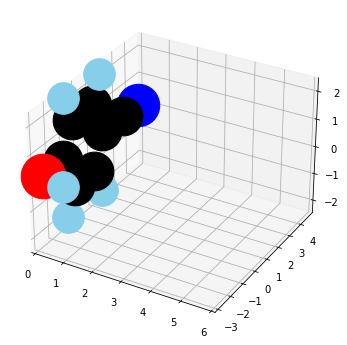

In [30]:
# Auftragung des Moleküls *
head, atom, coord = read_xyz('files/mol.xyz')
plot_struc(atom,coord)
plt.xlim(0, 6)

Weitere Verbessungen dieser Funktion könnte durch das Zeigen der Bindungen zwischen Atomen erreicht werden. Die Existenz der Bindungen für ein Atompaar kann mit der Summe der van-der-Waalschen Radien beider Atome entschieden werden. Der Algorithmus dafür wäre aber sehr lang und wird daher hier nicht gezeigt. 

#### Einschub III. 
----

Schreiben Sie eine Funktion, um die Rotationsmatrix zu finden, unter deren Einwirkung der Vektor $\vec{v_1}$ zu $\vec{v_2}$ tranformiert wird. 

**Hinweise**: 

Die Rotationsmatrix besitzt die Form $\underline{\underline{R}} = \begin{pmatrix} \cos(\theta) & - \sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix}$, wobei $\theta$ dem Drehwinkel entspricht. 

(Überlegen Sie anhand der vorherigen Transformation des Koordinatensystems warum die Rotationsmatrix solche Form aufnimmt.)

In [31]:
# Rationsmatrix *
def rot(v1,v2):
    theta = angle_vec(v1,v2) / 180 * np.pi
    sin = np.sin(theta)
    cos = np.cos(theta)
    R = np.array([[cos, -sin],
                  [sin,  cos]])
    
    return R

*Test der Funktion*

Berechnen Sie das Ergebnis von $\underline{\underline{R}} \cdot \vec{v_1}$ für den Fall $\vec{v_1} = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$ und $\vec{v_2} = \begin{pmatrix} -1 \\ 2 \end{pmatrix}$. 

In [32]:
# Test *
v1 = np.array([2,1])
v2 = np.array([-1,2])
R = rot(v1,v2)

print (R@v1)

[-1.  2.]


Die Rotationsmatrix wird oft in der Chemie angewandt, um die Ausrichtung von Molekülen durchzuführen. Dafür wird die drei-dimensionale Form eingesetzt: 

$\underline{\underline{R}}(\vec{a}, \theta)=\begin{pmatrix}{ccc}
\cos \theta+(1-\cos \theta) x^{2} & (1-\cos \theta) x y-(\sin \theta) z & (1-\cos \theta) x z+(\sin \theta) y \\
(1-\cos \theta) y x+(\sin \theta) z & \cos \theta+(1-\cos \theta) y^{2} & (1-\cos \theta) y z-(\sin \theta) x \\
(1-\cos \theta) z x-(\sin \theta) y & (1-\cos \theta) z y+(\sin \theta) x & \cos \theta+(1-\cos \theta) z^{2}
\end{pmatrix}$, 

wobei $\vec{a} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$ der Rotaionsachse entspricht und $\theta$ wie oben der Rotationswinkel ist. 

---